# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: May 2, 2023
* Student Name: Nicholas Cagliuso
* Student Net ID: nph4zk
* This URL: https://rivanna-portal.hpc.virginia.edu/node/udc-ba26-9/12110/lab?
* GitHub Repo URL: https://github.com/n-cagliuso/DS5100FinalProject

# The Monte Carlo Module

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd

class DieClass:
    """
    A die has N sides, or “faces”, and W weights, and can be rolled to select a face.
    W defaults to 1.0 for each face but can be changed after the object is created (see 'weight_change' method).
    Note that the weights are just numbers, not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.
    Note that what we are calling a “die” here can be any discrete random variable associated with a stochastic process, such as
    using a deck of cards or flipping a coin or speaking a language.
    Our probability model for such variable is, however, very simple – since our weights apply to only to single events, we are
    assuming that the events are independent. This makes sense for coin tosses but not for language use.
    """
    
    def __init__(self, faces=[]):
        """
        An initializer takes an array of faces as an argument. The array's data type (dtype) may be strings or numbers. 
        Internally Initializes the weights to 1.0 for each face.
        Saves both faces and weights into a private dataframe (__faces_weights) that is to be shared by the other methods.
        """
        self.faces = faces
        self.weights = [1.0 for i in self.faces]
        self.die_info = {'faces': self.faces, 'weights': self.weights} 
        self.__faces_weights = pd.DataFrame.from_dict(self.die_info)
           
    def weight_change(self, face_value, new_weight):
        """
        A method to change the weight of a single side.
        Takes two arguments: the face value to be changed (face_value) and the new weight (new_weight).
        Checks to see if the face passed is valid; is it in the array of weights (see if statement)?
        Checks to see if the weight is valid; is it a float? Can it be converted to one?
        """
        self.face_value = face_value
        self.new_weight = float(new_weight)
        if (face_value not in list(self.__faces_weights['faces'])):
            print("The face you have entered is not on your die. Please enter a correct face name.")
        else:
            self.__faces_weights.loc[self.__faces_weights.faces == face_value, 'weights'] = new_weight
        
    def die_roll(self, rolls_number = 1):
        """
        A method to roll the die one or more times.
        Takes a parameter of how many times the die is to be rolled; defaults to 1.
        This is essentially a random sample from the vector of faces according to the weights.
        Returns a list of outcomes.
        Does not store internally these results.
        """
        results = []
        self.rolls_number = int(rolls_number)
        self.total_weights = sum(self.weights)
        self.probabilities = [i/self.total_weights for i in self.__faces_weights['weights']]
        self.__faces_weights['Probabilites'] = self.probabilities
        for i in range(rolls_number):
            result = self.__faces_weights.faces.sample(weights = self.__faces_weights.Probabilites).values[0]
            results.append(result)
        return results
        
    def current_die(self):
        """
        A method to show the user the die’s current set of faces and weights (since the latter can be changed).
        Returns the dataframe created in the initializer.
        """
        return self.__faces_weights

class GameClass:
    """
A game consists of rolling of one or more dice of the same kind one or more times.
Each game is initialized with one or more of similarly defined dice (Die objects).
By “same kind” and “similarly defined” we mean that each die in a given game has the same number of sides and associated  faces, but each die object may have its own weights.
The class has a behavior to play a game, i.e. to rolls all of the dice a given number of times.
The class keeps the results of its most recent play.
    """
    
    def __init__(self, dice = []):
        """
An initializer
Takes a single parameter, a list of already instantiated similar Die objects.
        """
        self.dice = dice
    
    def play(self, number_rolls):
        """
A play method
Takes a parameter to specify how many times the dice should be rolled (number_rolls).
Saves the result of the play to a private dataframe of shape N rolls by M dice (__play_results).
The private dataframe should have the roll number is a named index.
This results in a table of data with columns for roll number, the die number (its list index), and the face rolled in that instance.     
        """ 
        self.number_rolls = int(number_rolls)
        results = []
        for i in self.dice:
            result = i.die_roll(number_rolls)
            results.append(result)
            self.__play_results = pd.DataFrame(results).transpose()
            self.__play_results.index.name = 'Roll Number'
            self.__play_results.columns.name = 'Dice Number'
        
    def show(self, form = 'wide'):
        """
A method to show the user the results of the most recent play.
This method just passes the private dataframe to the user.
Takes a parameter to return the dataframe in narrow or wide form.
This parameter defaults to wide form.
This parameter should raise an exception of the user passes an invalid option (see if statement).
The narrow form of the dataframe will have a twocolumn index with the roll number and the die number, and a column for the face rolled.
The wide form of the dataframe will a single column index with the roll number, and each die number as a column
        """
        self.form = str(form)
        self.wide = self.__play_results
        self.narrow = pd.DataFrame(self.__play_results.unstack())
        if self.form == 'wide':
            return self.wide
        elif self.form == 'narrow':
            return self.narrow
        else:
            raise ValueError("Please enter 'narrow' or 'wide' as your desired dataframe output.")
                             
class AnalyzerClass:
    """
An analyzer takes the results of a single game and computes various descriptive statistical properties about it. These properties results are available as attributes of an Analyzer object. Attributes (and associated methods) include:

A face counts per roll, i.e. the number of times a given face appeared in each roll. For example, if a roll of five dice has all sixes, then the counts for this roll would be 6 for the face value '6' and 0 for the other faces.

A jackpot count, i.e. how many times a roll resulted in all faces being the same, e.g. all one for a six-sided die.

A combo count, i.e. how many combination types of faces were rolled and their counts.
    """
    
    def __init__(self, game):
        """
An initializer
Takes a game object as its input parameter.
At initialization time, it also infers the data type of the die faces used.
        """
        self.game = game
        self.wide = self.game.wide
        self.wide.infer_objects().dtypes
        
    def jackpot(self):
        """
A jackpot method to compute how many times the game resulted in all faces being identical.
Returns an integer for the number of times to the user.
Stores the results as a dataframe of jackpot results in a public attribute (jackpot_results).
The dataframe should have the roll number as a named index.        
        """
        self.game.wide['Jackpot?'] = self.game.wide.eq(self.game.wide.iloc[:, 0], axis = 0).all(1).astype(int)
        self.jackpot_results = self.game.wide
        return self.game.wide['Jackpot?'].sum()
        
    def combo(self):
        """
A combo method to compute the distinct combinations of faces rolled, along with their counts.
Combinations should be sorted and saved as a multicolumned index.
Stores the results as a dataframe in a public attribute (face_results).
        """
        self.combo_results = self.game.wide.drop('Jackpot?', axis = 1)
        self.face_results = self.combo_results.apply(tuple, axis = 1).value_counts()
        self.face_results = pd.DataFrame(self.face_results)
        return self.face_results
    
        #combo_copy = self.game.show_results().copy()
        #self.combo_results = combo_copy.value_counts().to_frame('counts')
        
    def face_counts_per_roll(self):
        """
A face counts per roll method to compute how many times a given face is rolled in each event.
Stores the results as a dataframe in a public attribute (face_counts).
The dataframe has an index of the roll number and face values as columns (i.e. it is in wide format).       
        """
        self.combo_results = self.combo_results
        self.face_counts = self.combo_results.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        self.face_counts.columns.names = ['Faces']
        return self.face_counts
    
if __name__ == '__main__':
    test_object = DieClass(['A', 'B', 'C', 'D'])
    test_object.weight_change('B', 2.0)
    test_object.die_roll(3)
    test_object.current_die()
    test_object2 = DieClass(['A', 'B', 'C', 'D'])
    test_object2.weight_change('C', 3.0)
    test_object2.die_roll(2)
    test_object2.current_die()
    test_object3 = GameClass([test_object, test_object2])
    test_object3.play(3)
    test_object3.show('wide')
    test_object4 = AnalyzerClass(test_object3)
    test_object4.jackpot()
    test_object4.combo()
    test_object4.face_counts_per_roll()        

# Test Module

In [ ]:
import pandas as pd
import unittest
from montecarlo.montecarlo import *

class DieClassTest(unittest.TestCase):
    
    def test_1_change_weight(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        
        self.assertTrue(type(DieClass1.new_weight) == float)
       
    def test_2_roll_die(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        Roll_Number = 2
        DieClass1.die_roll(Roll_Number)
        
        expected = 2
        
        self.assertEqual(len(DieClass1.die_roll(Roll_Number)), expected)
        
    def test_3_current_die(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        Roll_Number = 2
        DieClass1.die_roll(Roll_Number)
        DieClass1.current_die()
        
        self.assertTrue(type(DieClass1.current_die() == 'pandas.core.frame.DataFrame'))
    
class GameClassTest(unittest.TestCase):
    
    def test_4_play_show(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        Roll_Number = 2
        DieClass1.die_roll(Roll_Number)
        DieClass1.current_die()
        GameClass1 = GameClass([DieClass1, DieClass1])
        Play_Number = 50
        GameClass1.play(Play_Number)
        GameClass1.show()
        
        self.assertTrue(type(GameClass1.show()) == pd.core.frame.DataFrame)
            
    def test_5_play_show(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        Roll_Number = 2
        DieClass1.die_roll(Roll_Number)
        DieClass1.current_die()
        GameClass1 = GameClass([DieClass1, DieClass1])
        Play_Number = 50
        GameClass1.play(Play_Number)
        GameClass1.show()
        
        expected = 50
        
        self.assertEqual(len(GameClass1.show()), expected)
        
    def test_6_show_narrow(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        Roll_Number = 2
        DieClass1.die_roll(Roll_Number)
        DieClass1.current_die()
        GameClass1 = GameClass([DieClass1, DieClass1])
        Play_Number = 50
        GameClass1.play(Play_Number)
        Form = 'narrow'
        GameClass1.show(Form)
        
        expected = 100
        
        self.assertEqual(len(GameClass1.show(Form)), expected)

class AnalyzerClassTest(unittest.TestCase):
    
    def test_7_jackpot(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        Roll_Number = 2
        DieClass1.die_roll(Roll_Number)
        DieClass1.current_die()
        GameClass1 = GameClass([DieClass1, DieClass1])
        Play_Number = 50
        GameClass1.play(Play_Number)
        GameClass1.show()
        AnalyzerClass1 = AnalyzerClass(GameClass1)
        AnalyzerClass1.jackpot()

        self.assertTrue(type(AnalyzerClass1.jackpot() == 'numpy.int64'))

    def test_8_combo(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        Roll_Number = 2
        DieClass1.die_roll(Roll_Number)
        DieClass1.current_die()
        GameClass1 = GameClass([DieClass1, DieClass1])
        Play_Number = 50
        GameClass1.play(Play_Number)
        GameClass1.show()
        AnalyzerClass1 = AnalyzerClass(GameClass1)
        AnalyzerClass1.jackpot()
        AnalyzerClass1.combo()
        
        expected = 1 
        self.assertEqual(AnalyzerClass1.face_results.shape[1], expected)
        
    def test_9_face_counts(self):
        DieClass1 = DieClass(['A', 'B', 'C'])
        Face = 'B'
        Weight = 5.0
        DieClass1.weight_change(Face, Weight)
        Roll_Number = 2
        DieClass1.die_roll(Roll_Number)
        DieClass1.current_die()
        GameClass1 = GameClass([DieClass1, DieClass1])
        Play_Number = 50
        GameClass1.play(Play_Number)
        GameClass1.show()
        AnalyzerClass1 = AnalyzerClass(GameClass1)
        AnalyzerClass1.jackpot()
        AnalyzerClass1.combo()
        AnalyzerClass1.face_counts_per_roll()
        
        self.assertFalse(len(AnalyzerClass1.face_counts) > 50)
        
if __name__ == '__main__':
    unittest.main(verbosity = 3)

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [3]:
import sys

In [4]:
sys.path.append("/scratch/nph4zk/DS5100FinalProject")

In [5]:
from montecarlo.montecarlo import *

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
FairCoin = DieClass(['H', 'T'])
UnfairCoin = DieClass(['H', 'T'])

In [8]:
UnfairCoin.weight_change('H', 5.0)

In [9]:
FairCoin.die_roll(2)

['T', 'T']

In [10]:
UnfairCoin.die_roll(2)

['H', 'T']

In [11]:
FairCoin.current_die()

,faces,weights,Probabilites
0,H,1.0,0.5
1,T,1.0,0.5


In [12]:
UnfairCoin.current_die()

,faces,weights,Probabilites
0,H,5.0,2.5
1,T,1.0,0.5


In [11]:
FairCoinGame = GameClass([FairCoin, FairCoin, FairCoin])

In [12]:
FairCoinGame.play(1000)

In [13]:
FairCoinGame.show()

Dice Number,0,1,2
Roll Number,,,
0,T,H,H
1,T,T,H
2,T,T,H
3,H,T,T
4,T,T,H
...,...,...,...
995,H,T,T
996,T,H,H
997,H,T,T


In [14]:
UnfairCoinGame = GameClass([UnfairCoin, UnfairCoin, FairCoin])

In [15]:
UnfairCoinGame.play(1000)

In [16]:
UnfairCoinGame.show()

Dice Number,0,1,2
Roll Number,,,
0,H,H,H
1,H,H,T
2,H,H,T
3,H,T,H
4,T,H,H
...,...,...,...
995,H,H,H
996,H,H,H
997,H,H,H


In [17]:
FairCoinAnalysis = AnalyzerClass(FairCoinGame)
UnfairCoinAnalysis = AnalyzerClass(UnfairCoinGame)

In [18]:
Fair_Frequency = FairCoinAnalysis.jackpot()/1000
Fair_Frequency

0.254

In [19]:
Unfair_Frequency = UnfairCoinAnalysis.jackpot()/1000
Unfair_Frequency

0.392

In [20]:
FairCoinAnalysis.combo()

,0
"(H, T, T)",137
"(H, H, T)",135
"(H, H, H)",130
"(H, T, H)",127
"(T, T, T)",124
"(T, H, T)",121
"(T, T, H)",119
"(T, H, H)",107


In [21]:
UnfairCoinAnalysis.combo()

,0
"(H, H, H)",373
"(H, H, T)",333
"(H, T, H)",68
"(T, H, T)",67
"(H, T, T)",67
"(T, H, H)",65
"(T, T, T)",19
"(T, T, H)",8


In [22]:
Frequencies = pd.DataFrame({'Fair': [Fair_Frequency], 'Unfair': [Unfair_Frequency]})

In [23]:
FairCoinAnalysis.face_counts_per_roll()

Faces,H,T
Roll Number,,
0,2,1
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
995,1,2
996,2,1
997,1,2


In [24]:
UnfairCoinAnalysis.face_counts_per_roll()

Faces,H,T
Roll Number,,
0,3,0
1,2,1
2,2,1
3,2,1
4,2,1
...,...,...
995,3,0
996,3,0
997,3,0


Text(0, 0.5, 'Frequency')

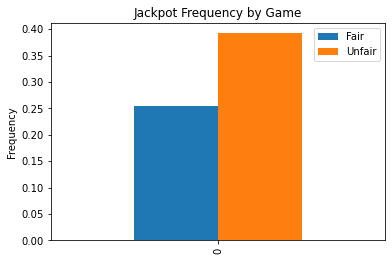

In [25]:
Frequencies.plot.bar()
plt.title("Jackpot Frequency by Game")
plt.ylabel("Frequency")

## Scenario 2

In [26]:
FairDie = DieClass([1, 2, 3, 4, 5, 6])
UnfairDieType1 = DieClass([1, 2, 3, 4, 5, 6])
UnfairDieType2 = DieClass([1, 2, 3, 4, 5, 6])

In [27]:
UnfairDieType1.weight_change(6, 5.0)
UnfairDieType2.weight_change(1, 5.0)

In [28]:
FairDie.die_roll(1)

[1]

In [29]:
UnfairDieType1.die_roll(1)

[2]

In [30]:
UnfairDieType2.die_roll(1)

[1]

In [31]:
FairDie.current_die()

,faces,weights,Probabilites
0,1,1.0,0.166667
1,2,1.0,0.166667
2,3,1.0,0.166667
3,4,1.0,0.166667
4,5,1.0,0.166667
5,6,1.0,0.166667


In [32]:
UnfairDieType1.current_die()

,faces,weights,Probabilites
0,1,1.0,0.166667
1,2,1.0,0.166667
2,3,1.0,0.166667
3,4,1.0,0.166667
4,5,1.0,0.166667
5,6,5.0,0.833333


In [33]:
UnfairDieType2.current_die()

,faces,weights,Probabilites
0,1,5.0,0.833333
1,2,1.0,0.166667
2,3,1.0,0.166667
3,4,1.0,0.166667
4,5,1.0,0.166667
5,6,1.0,0.166667


In [34]:
FairDieGame = GameClass([FairDie, FairDie, FairDie, FairDie, FairDie])

In [35]:
FairDieGame.play(10000)

In [36]:
FairDieGame.show()

Dice Number,0,1,2,3,4
Roll Number,,,,,
0,1,1,3,6,3
1,5,4,6,1,3
2,5,1,1,4,2
3,3,4,5,2,1
4,5,2,5,6,1
...,...,...,...,...,...
9995,2,6,5,6,3
9996,1,6,6,5,6
9997,1,1,3,2,5


In [37]:
UnfairDieGame = GameClass([UnfairDieType1, UnfairDieType1, UnfairDieType2, FairDie, FairDie])

In [38]:
UnfairDieGame.play(10000)

In [39]:
UnfairDieGame.show()

Dice Number,0,1,2,3,4
Roll Number,,,,,
0,6,6,1,3,2
1,6,5,1,2,6
2,6,6,1,2,1
3,6,1,1,1,2
4,6,6,5,6,4
...,...,...,...,...,...
9995,4,1,1,3,5
9996,3,1,1,4,6
9997,6,6,1,4,4


In [40]:
FairDieAnalysis = AnalyzerClass(FairDieGame)
UnfairDieAnalysis = AnalyzerClass(UnfairDieGame)

In [41]:
Fair_Die_Frequency = FairDieAnalysis.jackpot()/10000
Fair_Die_Frequency

0.0009

In [42]:
Unfair_Die_Frequency = UnfairDieAnalysis.jackpot()/10000
Unfair_Die_Frequency

0.0013

In [43]:
FairDieAnalysis.combo()

,0
"(5, 2, 5, 4, 3)",7
"(2, 5, 4, 6, 4)",7
"(6, 6, 4, 3, 1)",7
"(1, 2, 2, 2, 6)",6
"(4, 5, 1, 5, 3)",6
...,...
"(4, 4, 4, 2, 6)",1
"(2, 2, 5, 2, 5)",1
"(2, 5, 4, 5, 1)",1
"(2, 3, 4, 4, 3)",1


In [44]:
UnfairDieAnalysis.combo()

,0
"(6, 6, 1, 3, 2)",44
"(6, 6, 1, 4, 4)",43
"(6, 6, 1, 6, 3)",42
"(6, 6, 1, 4, 5)",42
"(6, 6, 1, 1, 1)",41
...,...
"(2, 1, 5, 3, 3)",1
"(2, 4, 6, 3, 2)",1
"(1, 6, 3, 6, 2)",1
"(1, 1, 1, 5, 4)",1


In [45]:
Die_Frequencies = pd.DataFrame({'Fair': [Fair_Die_Frequency], 'Unfair': [Unfair_Die_Frequency]})

In [46]:
FairDieAnalysis.face_counts_per_roll()

Faces,1,2,3,4,5,6
Roll Number,,,,,,
0,2,0,2,0,0,1
1,1,0,1,1,1,1
2,2,1,0,1,1,0
3,1,1,1,1,1,0
4,1,1,0,0,2,1
...,...,...,...,...,...,...
9995,0,1,1,0,1,2
9996,1,0,0,0,1,3
9997,2,1,1,0,1,0


In [47]:
UnfairDieAnalysis.face_counts_per_roll()

Faces,1,2,3,4,5,6
Roll Number,,,,,,
0,1,1,1,0,0,2
1,1,1,0,0,1,2
2,2,1,0,0,0,2
3,3,1,0,0,0,1
4,0,0,0,1,1,3
...,...,...,...,...,...,...
9995,2,0,1,1,1,0
9996,2,0,1,1,0,1
9997,1,0,0,2,0,2


Text(0, 0.5, 'Frequency')

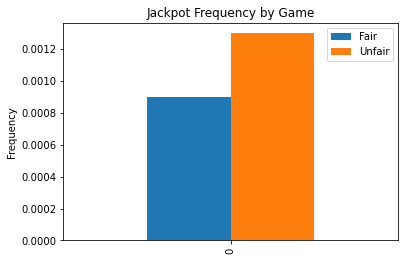

In [48]:
Die_Frequencies.plot.bar()
plt.title("Jackpot Frequency by Game")
plt.ylabel("Frequency")

Text(0, 0.5, 'Count')

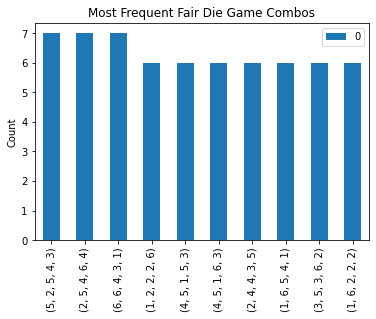

In [49]:
FairDieAnalysis.combo().head(10).plot.bar()
plt.title("Most Frequent Fair Die Game Combos")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

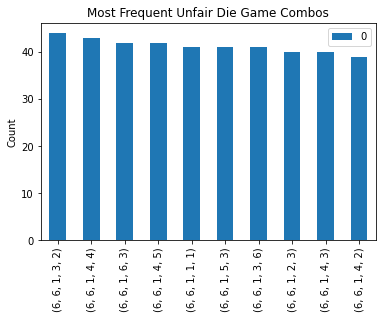

In [50]:
UnfairDieAnalysis.combo().head(10).plot.bar()
plt.title("Most Frequent Unfair Die Game Combos")
plt.ylabel("Count")

## Scenario 3

In [51]:
Alpha = DieClass(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

In [52]:
Alpha.weight_change('A', 8.4966)
Alpha.weight_change('B', 2.0720)
Alpha.weight_change('C', 4.5388)
Alpha.weight_change('D', 3.3844)
Alpha.weight_change('E', 11.1607)
Alpha.weight_change('F', 1.8121)
Alpha.weight_change('G', 2.4705)
Alpha.weight_change('H', 3.0034)
Alpha.weight_change('I', 7.5448)
Alpha.weight_change('J', 0.1965)
Alpha.weight_change('K', 1.1016)
Alpha.weight_change('L', 5.4893)
Alpha.weight_change('M', 3.0129)
Alpha.weight_change('N', 6.6544)
Alpha.weight_change('O', 7.1635)
Alpha.weight_change('P', 3.1671)
Alpha.weight_change('Q', 0.1962)
Alpha.weight_change('R', 7.5809)
Alpha.weight_change('S', 5.7351)
Alpha.weight_change('T', 6.9509)
Alpha.weight_change('U', 3.6308)
Alpha.weight_change('V', 1.0074)
Alpha.weight_change('W', 1.2899)
Alpha.weight_change('X', 0.2902)
Alpha.weight_change('Y', 1.7779)
Alpha.weight_change('Z', 0.2722)

In [53]:
Alpha.die_roll(1)

['Y']

In [54]:
Alpha.current_die()

,faces,weights,Probabilites
0,A,8.4966,0.326792
1,B,2.0720,0.079692
2,C,4.5388,0.174569
3,D,3.3844,0.130169
4,E,11.1607,0.429258
5,F,1.8121,0.069696
6,G,2.4705,0.095019
7,H,3.0034,0.115515
8,I,7.5448,0.290185
9,J,0.1965,0.007558


In [55]:
AlphaGame = GameClass([Alpha, Alpha, Alpha, Alpha, Alpha])

In [56]:
AlphaGame.play(1000)

In [57]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

AlphaGame.show()

Dice Number,0,1,2,3,4
Roll Number,,,,,
0,I,B,A,E,O
1,C,S,I,B,E
2,A,I,T,A,O
3,U,E,E,I,H
4,T,S,A,O,N
5,M,E,A,R,R
6,C,L,E,E,E
7,A,A,K,W,T
8,C,F,T,T,W


To search for combos that were English words, I simply scrolled through the output of 'AlphaGame.show()' and entered strings that "looked" like English words (i.e., contained both consonants and vowels and followed similar patterns to known English words) into Merriam-Webster. Defining "word" to simply mean anything that has an entry in Merriam-Webster, the following strings from the above dataframe are words: ‘ASSIN,’ ‘DOILY,’ ‘LUNAS,’ ‘RAGAE,’ ‘THION,’ ‘FORAN,’ ‘IMMED,’ ‘ASEAN,’ ‘FARSI,’ ‘STATE,’ ‘NONES,’ ‘ASIAN,’ ‘OPERA,’ and ‘BRAME.’ This is a total of fourteen words, meaning the total frequency of these words in the dataframe is 14/1,000 = .014. The relative frequency of these words to the remaining combos is 14/(1,000-14) = .014199; it could also be said that approximately one out of every 70 combos in the dataframe above is a word, as (1000-14)/14 = 70.429. 


In [58]:
AlphaAnalysis = AnalyzerClass(AlphaGame)

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [15]:
!ls -lRF -o

.:
total 819
-rw-r--r-- 1 nph4zk 398231 May  2 19:45 FinalProjectReport.ipynb
-rw-r--r-- 1 nph4zk   1067 Apr 20 17:49 LICENSE
drwxr-sr-x 4 nph4zk   4096 May  2 19:45 montecarlo/
-rw-r--r-- 1 nph4zk 390052 May  2 18:58 montecarlo_demo.ipynb
drwxr-sr-x 2 nph4zk   4096 May  1 19:55 montecarlo.egg-info/
-rw-r--r-- 1 nph4zk    805 May  2 19:17 montecarlo_results.txt
-rw-r--r-- 1 nph4zk   4612 May  2 19:10 montecarlo_tests.py
-rw-r--r-- 1 nph4zk   9190 May  2 21:27 README.md
-rw-r--r-- 1 nph4zk    537 May  1 19:14 setup.py

./montecarlo:
total 33
-rw-r--r-- 1 nph4zk     0 Apr 20 17:55 __init__.py
-rw-r--r-- 1 nph4zk   155 May  2 15:07 __init__.pyc
-rw-r--r-- 1 nph4zk  9406 May  2 19:45 montecarlo.py
-rw-r--r-- 1 nph4zk 10746 May  2 19:16 montecarlo.pyc
drwxr-sr-x 2 nph4zk  4096 May  2 19:10 __pycache__/

./montecarlo/__pycache__:
total 17
-rw-r--r-- 1 nph4zk  151 May  1 19:40 __init__.cpython-36.pyc
-rw-r--r-- 1 nph4zk  159 Apr 30 19:13 __init__.cpython-38.pyc
-rw-r--r-- 1 nph4zk 9666 May  2

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [2]:
!pip install -e.

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///gpfs/gpfs0/scratch/nph4zk/DS5100FinalProject
  Running setup.py develop for montecarlo
